In [181]:
%matplotlib inline

In [24]:
import numpy as np
data2=np.loadtxt('D:/number_recognizer/test.txt')
target2=np.loadtxt('D:/number_recognizer/target.txt')

print(data2.shape)
print(target2.shape)

(1153L, 64L)
(1153L,)


In [31]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier

from sklearn import datasets, svm, metrics


#digits = datasets.load_digits()

'''
images_and_labels = list(zip(digits.images, digits.target))
for index, (image, label) in enumerate(images_and_labels[:4]):
    plt.subplot(2, 4, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Training: %i' % label)


n_samples = len(digits.images)
'''
target2 = target2.astype(int)
#data = digits.images.reshape((n_samples, -1))
data = data2
#data = data2[:,np.nonzero(rfe.ranking_ < 10)[0]]
n_samples = len(target2)


#classifier = SGDClassifier(alpha=0.0001, fit_intercept=True, n_iter=200)
classifier = svm.SVC(gamma=0.0013)


#classifier.fit(data[:n_samples / 2], digits.target[:n_samples / 2])
classifier.fit(data[:n_samples / 2], target2[:n_samples / 2])


#expected = digits.target[n_samples / 2:]
expected = target2[n_samples / 2:]
predicted = classifier.predict(data[n_samples / 2:])


print("Classification report for classifier %s:\n%s\n"
    % (classifier, metrics.classification_report(expected, predicted)))
print("Confusion matrix:\n%s"
    % metrics.confusion_matrix(expected, predicted))

'''
images_and_predictions = list(
                        zip(digits.images[n_samples / 2:], predicted))
for index, (image, prediction) in enumerate(images_and_predictions[:4]):
    plt.subplot(2, 4, index + 5)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Prediction: %i' % prediction)

plt.show()
'''



Classification report for classifier SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0, degree=3,
  gamma=0.0013, kernel='rbf', max_iter=-1, probability=False,
  random_state=None, shrinking=True, tol=0.001, verbose=False):
             precision    recall  f1-score   support

          0       0.40      0.35      0.37        65
          1       0.55      0.90      0.68        39
          2       0.54      0.57      0.56        70
          3       0.38      0.45      0.41        58
          4       0.45      0.31      0.37        61
          5       0.54      0.33      0.41        60
          6       0.42      0.48      0.44        63
          7       0.44      0.47      0.46        51
          8       0.56      0.55      0.55        62
          9       0.48      0.46      0.47        48

avg / total       0.47      0.47      0.47       577


Confusion matrix:
[[23  2  9  8  1  2  7  4  9  0]
 [ 0 35  0  1  0  1  0  2  0  0]
 [ 9  5 40  8  1  2  3  1  0  1]
 [ 3  4  7 26

"\nimages_and_predictions = list(\n                        zip(digits.images[n_samples / 2:], predicted))\nfor index, (image, prediction) in enumerate(images_and_predictions[:4]):\n    plt.subplot(2, 4, index + 5)\n    plt.axis('off')\n    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')\n    plt.title('Prediction: %i' % prediction)\n\nplt.show()\n"

In [4]:
from sklearn.externals import joblib

joblib.dump(classifier, "./machine2.pkl") 

['./machine2.pkl',
 './machine2.pkl_01.npy',
 './machine2.pkl_02.npy',
 './machine2.pkl_03.npy',
 './machine2.pkl_04.npy',
 './machine2.pkl_05.npy',
 './machine2.pkl_06.npy',
 './machine2.pkl_07.npy',
 './machine2.pkl_08.npy',
 './machine2.pkl_09.npy',
 './machine2.pkl_10.npy',
 './machine2.pkl_11.npy']

In [22]:
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.feature_selection import RFE
import matplotlib.pyplot as plt

# Load the digits dataset
X = data2[:n_samples / 2]
y = target2[:n_samples / 2]

X = np.reshape((8,8))

# Create the RFE object and rank each pixel
svc = SVC(kernel="linear", C=1)
rfe = RFE(estimator=svc, n_features_to_select=1, step=1)
rfe.fit(X, y)
ranking = rfe.ranking_.reshape(digits.images[0].shape)


# Plot pixel ranking
plt.matshow(ranking)
plt.colorbar()
plt.title("Ranking of pixels with RFE")
plt.show()

ValueError: total size of new array must be unchanged

In [9]:
np.nonzero(rfe.ranking_ < 15)[0] 

array([ 2,  3,  4,  9, 10, 11, 12, 13, 14, 17, 18, 19, 20, 21, 22, 25, 26,
       27, 28, 29, 30, 32, 33, 34, 35, 36, 37, 38, 41, 42, 43, 44, 45, 46,
       49, 50, 51, 52, 53, 54, 58, 59, 60, 61, 62], dtype=int64)

In [10]:
X[:,np.nonzero(rfe.ranking_ < 15)[0]].shape

(576L, 45L)

In [11]:
rfe.ranking_ 

array([33, 32, 14,  1, 10, 16, 24, 22, 21,  6,  1,  2,  1,  1, 12, 23, 25,
       11,  1,  4,  5,  1,  1, 28, 20,  1,  1,  1,  1,  1,  1, 29,  1,  1,
        1,  1,  3,  1,  1, 18, 19,  1,  1,  1,  8,  1,  1, 17, 30, 13,  1,
        1,  1,  1,  1, 15, 26, 27,  9,  1,  1,  1,  7, 31])

In [12]:
expected = target2[n_samples / 2:]
predicted = rfe.predict(data2[n_samples / 2:])


print("Classification report for classifier %s:\n%s\n"
   % (rfe, metrics.classification_report(expected, predicted)))
print("Confusion matrix:\n%s"
    % metrics.confusion_matrix(expected, predicted))



Classification report for classifier RFE(estimator=SVC(C=1, cache_size=200, class_weight=None, coef0=0.0, degree=3, gamma=0.0,
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
  estimator_params=None, n_features_to_select=None, step=1, verbose=0):
             precision    recall  f1-score   support

          0       0.34      0.32      0.33        65
          1       0.39      0.85      0.54        39
          2       0.42      0.46      0.44        70
          3       0.26      0.33      0.29        58
          4       0.36      0.36      0.36        61
          5       0.23      0.15      0.18        60
          6       0.37      0.30      0.33        63
          7       0.43      0.45      0.44        51
          8       0.38      0.21      0.27        62
          9       0.30      0.27      0.28        48

avg / total       0.35      0.35      0.34       577


Confusion matrix:
[[21  5  6  6  2  3  9  4  6

Optimal number of features : 43


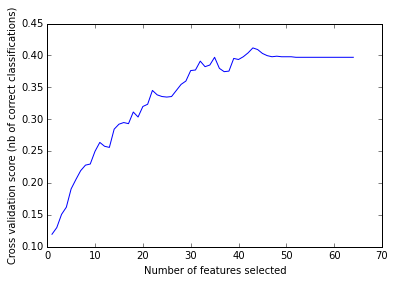

In [29]:
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.cross_validation import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.datasets import make_classification

# Build a classification task using 3 informative features
X = data2
y = target2

# Create the RFE object and compute a cross-validated score.
svc = SVC(kernel="linear")
# The "accuracy" scoring is proportional to the number of correct
# classifications
rfecv = RFECV(estimator=svc, step=1, cv=StratifiedKFold(y, 2),
              scoring='accuracy')
rfecv.fit(X, y)

print("Optimal number of features : %d" % rfecv.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()



In [ ]:
expected = target2[n_samples / 2:]
predicted = rfecv.predict(data2[n_samples / 2:])


print("Classification report for classifier %s:\n%s\n"
    % (rfecv, metrics.classification_report(expected, predicted)))
print("Confusion matrix:\n%s"
    % metrics.confusion_matrix(expected, predicted))

In [174]:
from sklearn import svm
from sklearn.datasets import samples_generator
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.pipeline import make_pipeline

# import some data to play with
X, y = samples_generator.make_classification(
    n_features=20, n_informative=3, n_redundant=0, n_classes=4,
    n_clusters_per_class=2)

# ANOVA SVM-C
# 1) anova filter, take 3 best ranked features
anova_filter = SelectKBest(f_regression, k=3)
# 2) svm
clf = svm.SVC(kernel='linear')

anova_svm = make_pipeline(anova_filter, clf)
anova_svm.fit(X, y)
anova_svm.predict(X)

array([2, 1, 3, 2, 1, 1, 1, 3, 0, 0, 2, 3, 0, 3, 2, 3, 3, 2, 1, 2, 0, 0, 1,
       3, 3, 1, 0, 1, 2, 0, 3, 2, 1, 2, 2, 1, 0, 1, 1, 3, 1, 0, 0, 0, 1, 1,
       3, 2, 3, 3, 0, 2, 3, 2, 2, 0, 1, 2, 2, 1, 3, 3, 0, 0, 1, 3, 2, 0, 3,
       1, 0, 3, 3, 0, 0, 2, 3, 2, 2, 1, 2, 0, 3, 1, 2, 0, 2, 2, 1, 0, 1, 1,
       2, 0, 3, 2, 1, 3, 0, 2])